In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [6]:
results_all = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results_all[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }

In [7]:
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top10_features = indices[:10]

In [8]:
X_train_top = X_train_scaled[:, top10_features]
X_test_top = X_test_scaled[:, top10_features]

In [9]:
results_top10 = {}
for name, model in models.items():
    model.fit(X_train_top, y_train)
    y_pred = model.predict(X_test_top)
    results_top10[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }

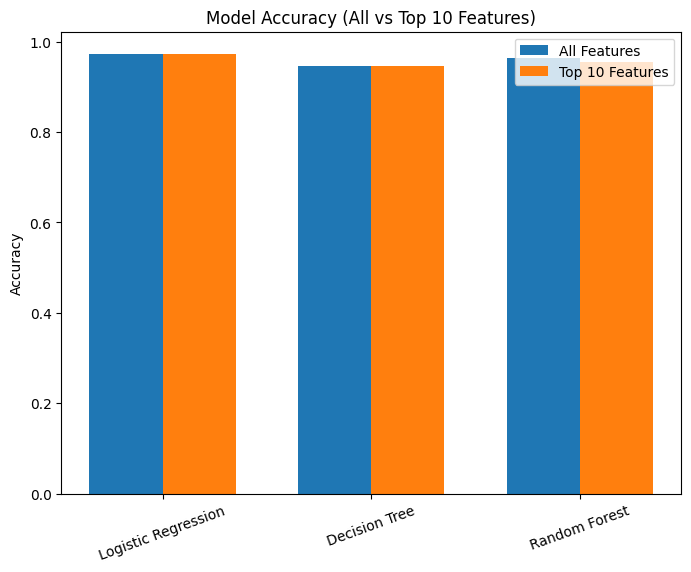

In [10]:
plt.figure(figsize=(8,6))
bar_width = 0.35
x = np.arange(len(models))

plt.bar(x - bar_width/2, [results_all[m]["accuracy"] for m in models], width=bar_width, label="All Features")
plt.bar(x + bar_width/2, [results_top10[m]["accuracy"] for m in models], width=bar_width, label="Top 10 Features")

plt.xticks(x, models.keys(), rotation=20)
plt.ylabel("Accuracy")
plt.title("Model Accuracy (All vs Top 10 Features)")
plt.legend()
plt.show()

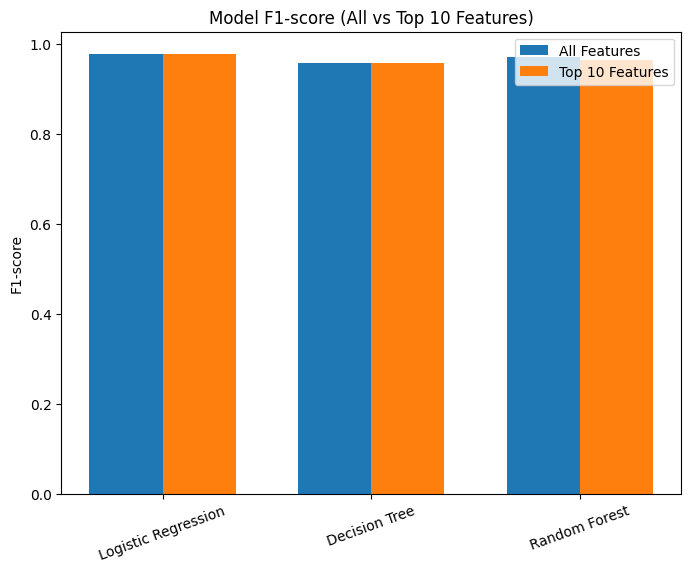

In [11]:
plt.figure(figsize=(8,6))
plt.bar(x - bar_width/2, [results_all[m]["f1"] for m in models], width=bar_width, label="All Features")
plt.bar(x + bar_width/2, [results_top10[m]["f1"] for m in models], width=bar_width, label="Top 10 Features")

plt.xticks(x, models.keys(), rotation=20)
plt.ylabel("F1-score")
plt.title("Model F1-score (All vs Top 10 Features)")
plt.legend()
plt.show()

In [13]:
import pandas as pd
all_results = []
for model in models.keys():
    all_results.append([
        model,
        round(results_all[model]["accuracy"], 4),
        round(results_all[model]["f1"], 4),
        round(results_top10[model]["accuracy"], 4),
        round(results_top10[model]["f1"], 4)
    ])

df_results = pd.DataFrame(all_results, columns=[
    "Model", "Accuracy (All)", "F1 (All)", "Accuracy (Top 10)", "F1 (Top 10)"
])

print("\nModel Performance Comparison\n")
print(df_results.to_string(index=False))



Model Performance Comparison

              Model  Accuracy (All)  F1 (All)  Accuracy (Top 10)  F1 (Top 10)
Logistic Regression          0.9737    0.9790             0.9737       0.9787
      Decision Tree          0.9474    0.9577             0.9474       0.9589
      Random Forest          0.9649    0.9722             0.9561       0.9650
